# Trying out NumPy's SVD

In [31]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

%matplotlib inline

In [2]:
#Parameters
vmin = 0
vmax = 1
image_bias = 1 

Import image to take SVD of

Size of the image is :  (512, 512)


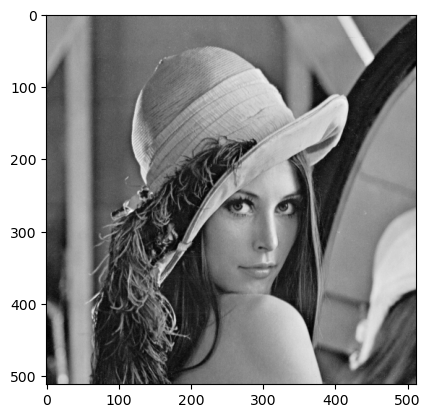

In [17]:
# Open the PNG image
image = Image.open('lena.png')

# Convert the image to grayscale
grayscale_image = image.convert('L')

# Convert the image to a NumPy array
A = np.array(grayscale_image)

# Remember image size
n = len(A)
print("Size of the image is : " , A.shape)

# Show image
imshow(A, cmap='gray')
plt.show()

## Taking SVD

In [18]:
U, S, V = svd(A)

## Observing U

In [23]:
# Size of U
print("Size of U is: ", U.shape)

Size of U is:  (512, 512)


In [24]:
print(np.round(U,2))

[[-0.05  0.03 -0.02 ...  0.07  0.02  0.  ]
 [-0.05  0.03 -0.02 ...  0.52 -0.12 -0.  ]
 [-0.05  0.03 -0.02 ...  0.14 -0.6   0.  ]
 ...
 [-0.04  0.05  0.02 ... -0.   -0.   -0.  ]
 [-0.04  0.05  0.02 ...  0.    0.   -0.71]
 [-0.04  0.05  0.02 ...  0.    0.    0.71]]


## Observing S

In [25]:
# Size of U
print("Size of Sigma is: ", S.shape)

Size of Sigma is:  (512,)


In [26]:
sigma = np.diag(S)
print(np.round(sigma,2))

[[64735.24     0.       0.   ...     0.       0.       0.  ]
 [    0.   10596.26     0.   ...     0.       0.       0.  ]
 [    0.       0.    8175.42 ...     0.       0.       0.  ]
 ...
 [    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ...     0.       0.       0.  ]]


NumPy saves sigma as a vector not a Matrix. Remember to create a diagonal matrix from it first.

## Observing V

In [27]:
# Size of V
print("Size of V is: ", V.shape)

Size of V is:  (512, 512)


In [28]:
print(np.round(V,2))

[[-0.03 -0.03 -0.03 ... -0.05 -0.05 -0.05]
 [ 0.03  0.03  0.03 ... -0.08 -0.08 -0.08]
 [-0.02 -0.02 -0.02 ... -0.07 -0.07 -0.08]
 ...
 [ 0.   -0.01  0.06 ... -0.07  0.09 -0.04]
 [ 0.   -0.01 -0.06 ...  0.01  0.02 -0.04]
 [ 0.    0.    0.   ... -0.02 -0.03  0.03]]


## Taking Sums

### First matrix

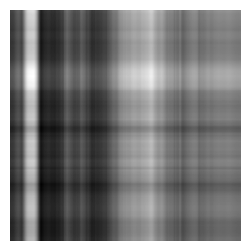

In [40]:
# Get first matrix
first = S[0]*np.outer(U[:,0],V[0])

# Plot first matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(first, cmap='gray')
plt.axis('off')
plt.show()

### Second Matrix + Overall sum

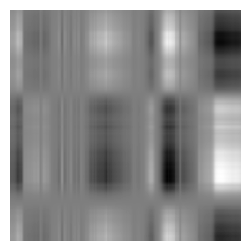

In [39]:
# Get first matrix
second = S[1]*np.outer(U[:,1],V[1])

# Plot scond matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(second, cmap='gray')
plt.axis('off')
plt.show()

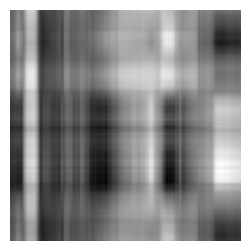

In [41]:
# Plot overall sum
img_sum = first + second

plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img_sum, cmap='gray')
plt.axis('off')
plt.show()

### Third matrix + overall sum

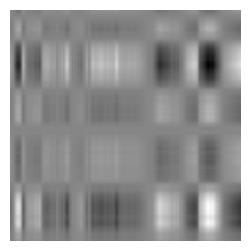

In [42]:
# Get first matrix
third = S[2]*np.outer(U[:,2],V[2])

# Plot scond matrix
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(third, cmap='gray')
plt.axis('off')
plt.show()

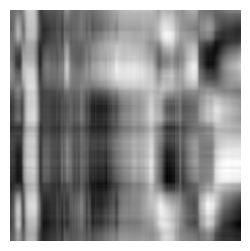

In [43]:
# Plot overall sum
img_sum += third

plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img_sum, cmap='gray')
plt.axis('off')
plt.show()

## Get first N Sums

In [58]:
def get_image(U, S, V, N = 50):
    final_img = np.zeros((n, n))
    
    for i in range(N):
        matrix = S[i]*np.outer(U[:,i],V[i])
        final_img += matrix
    
    plt.figure(figsize=(5, 5))
    plt.imshow(final_img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    return final_img

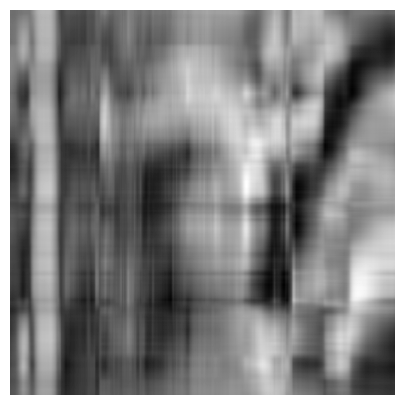

In [64]:
N_5 = get_image(U, S, V, N = 5)

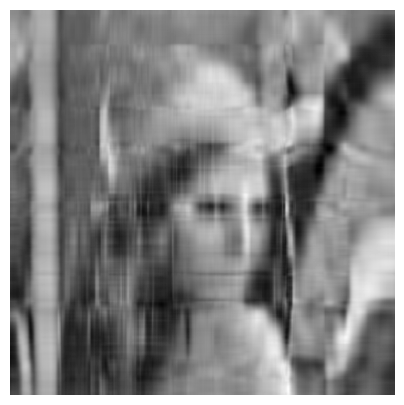

In [59]:
N_10 = get_image(U, S, V, N = 10)

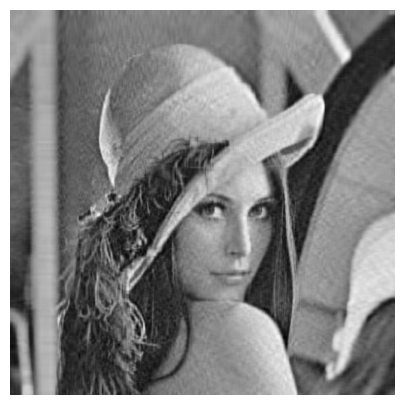

In [66]:
N_50 = get_image(U, S, V, N = 50)

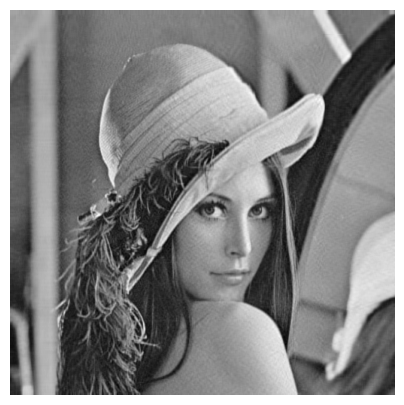

In [61]:
N_100 = get_image(U, S, V, N = 100)

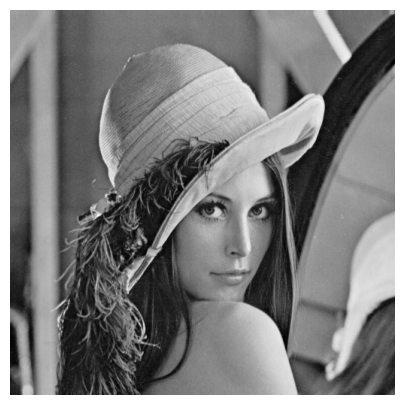

In [62]:
N_250 = get_image(U, S, V, N = 250)

## Plotting it all

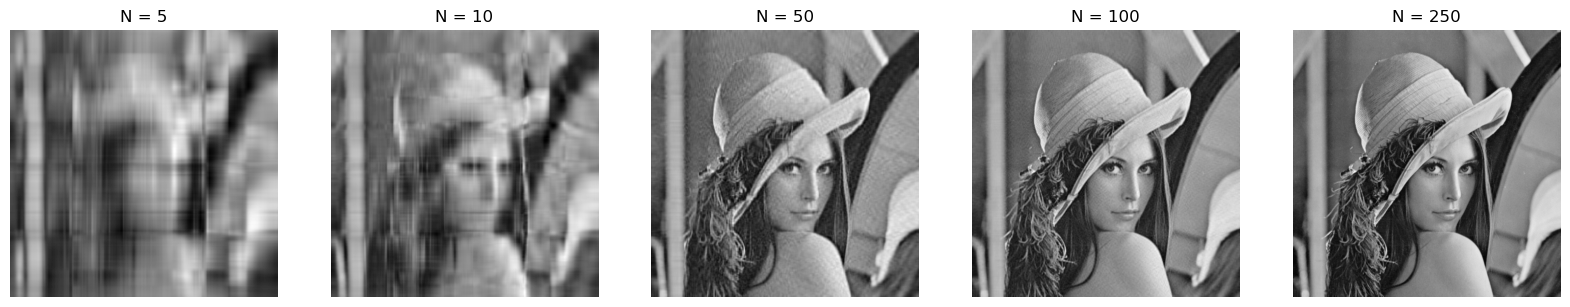

In [71]:
images = [N_5, N_10, N_50, N_100, N_250]
N_values = [5, 10, 50, 100, 250]

# Create a figure and subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 10))

# Plot each image on a separate subplot
for i in range(5):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title('N = {}'.format(N_values[i]))

plt.show()

## Compare Original and Truncated

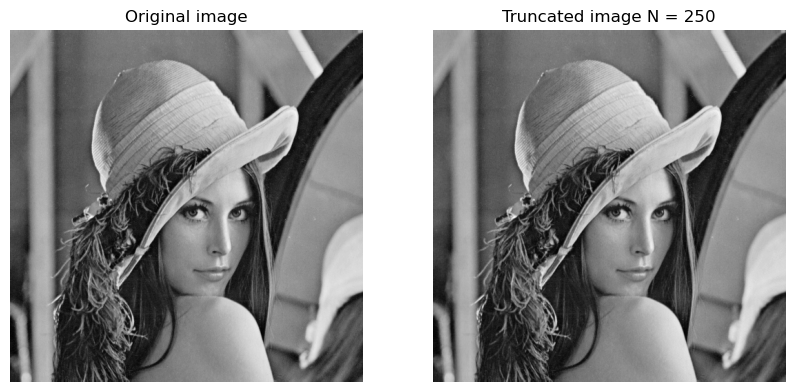

In [74]:
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Plot original on the left
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.axis('off')
plt.title('Original image')

# Plot truncated on the right
plt.subplot(1, 2, 2)
plt.imshow(N_250, cmap='gray')
plt.axis('off')
plt.title('Truncated image N = 250')

plt.show()